## By: Vardhaman R P
    
  ### for dataset and problem description  
  ###  visit https://github.com/vardhaman-datascience/People-Charm-Machine-learning-classification-

In [1]:
import pandas as pd
import numpy as np

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.metrics import confusion_matrix


In [158]:
from IPython.display import Image, display

In [2]:
data=pd.read_csv('E:/Data_Science/Assignments/machine_learning/Assignment2_PGD B7/Assignment2_PGD B7/People Charm case.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [13]:
len(data)

14999

In [261]:
data.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
lastEvaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numberOfProjects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
avgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
timeSpent.company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotionInLast5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


# EDA

### satisfactory level v/s leaving the job

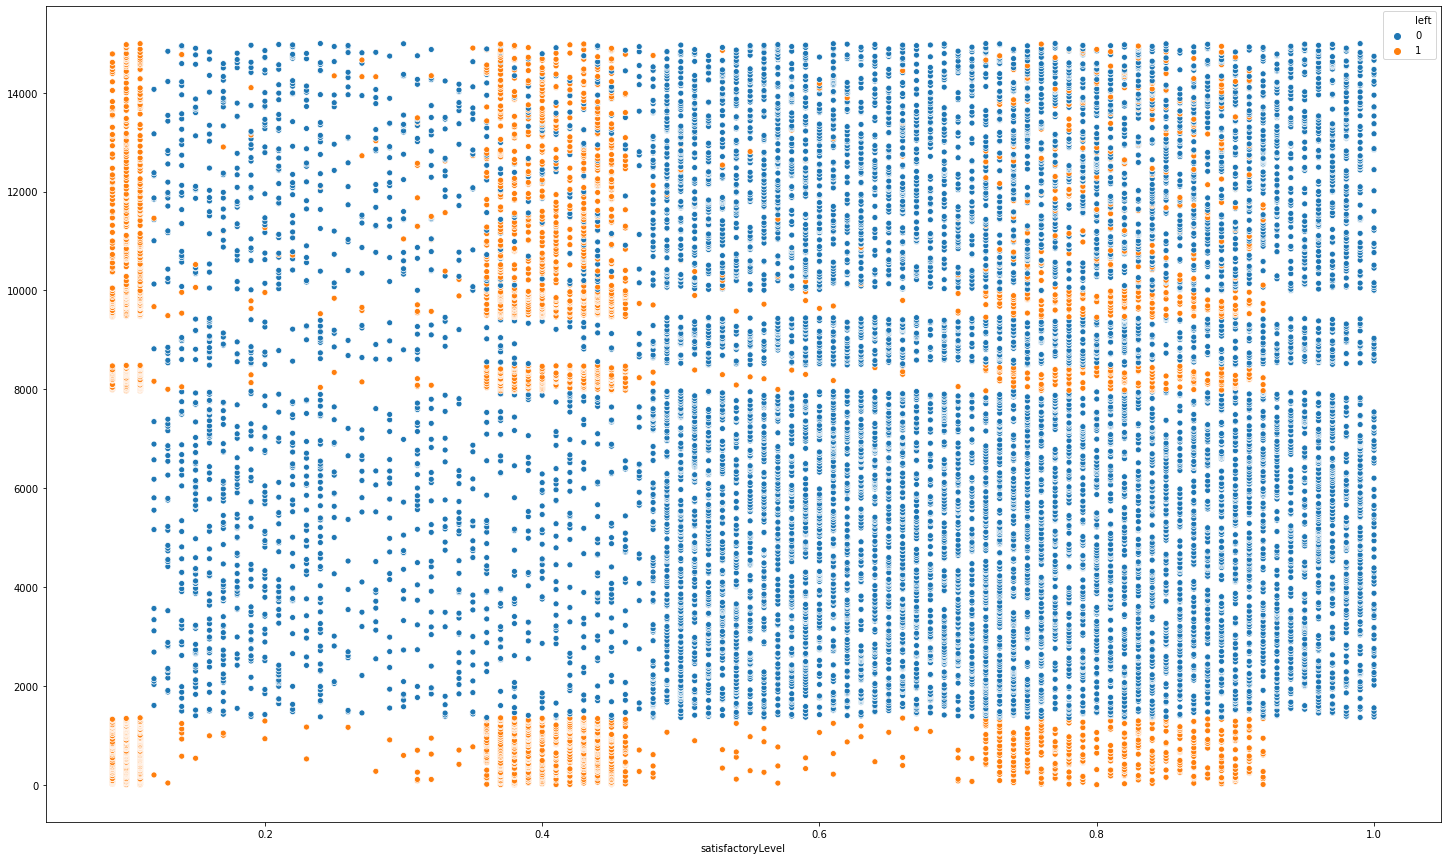

In [191]:
plt.figure(figsize=(25,15))
sb.scatterplot(data['satisfactoryLevel'],data.index,data['left'])

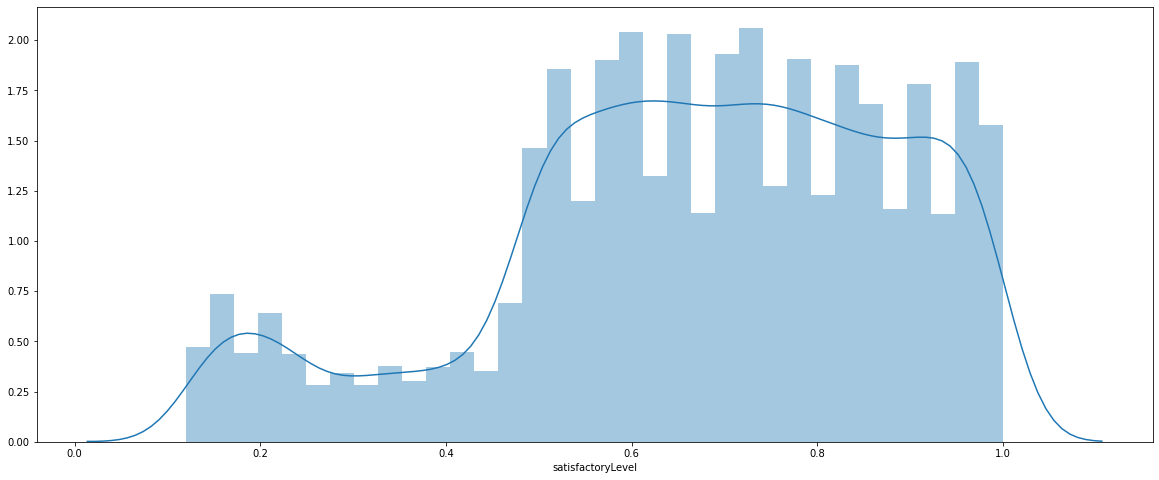

In [185]:
plt.figure(figsize=(20,8))
sb.distplot(data[data['left']==0]['satisfactoryLevel'])

### we can observe more no of high satisfactory people are not leaving the job comare to low satisfactory people

#   

## lastEvaluation v/s leaving the job

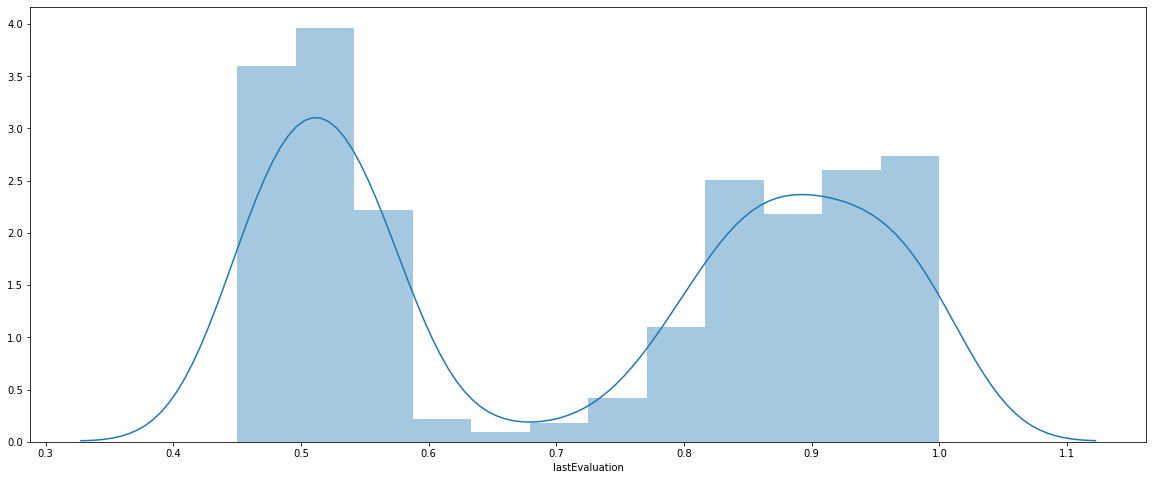

In [186]:
plt.figure(figsize=(20,8))
sb.distplot(data[data['left']==1]['lastEvaluation'])

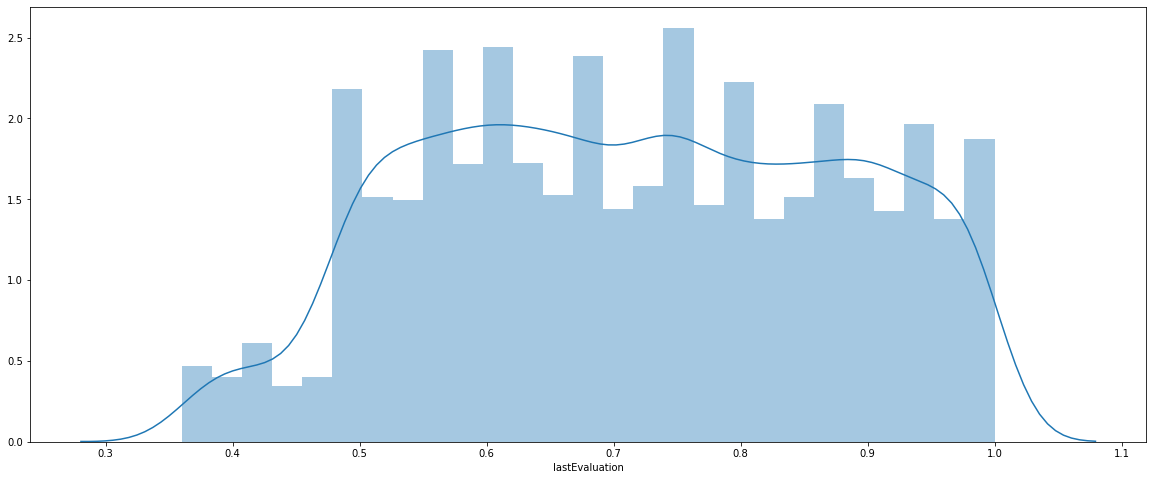

In [187]:
plt.figure(figsize=(20,8))
sb.distplot(data[data['left']==0]['lastEvaluation'])

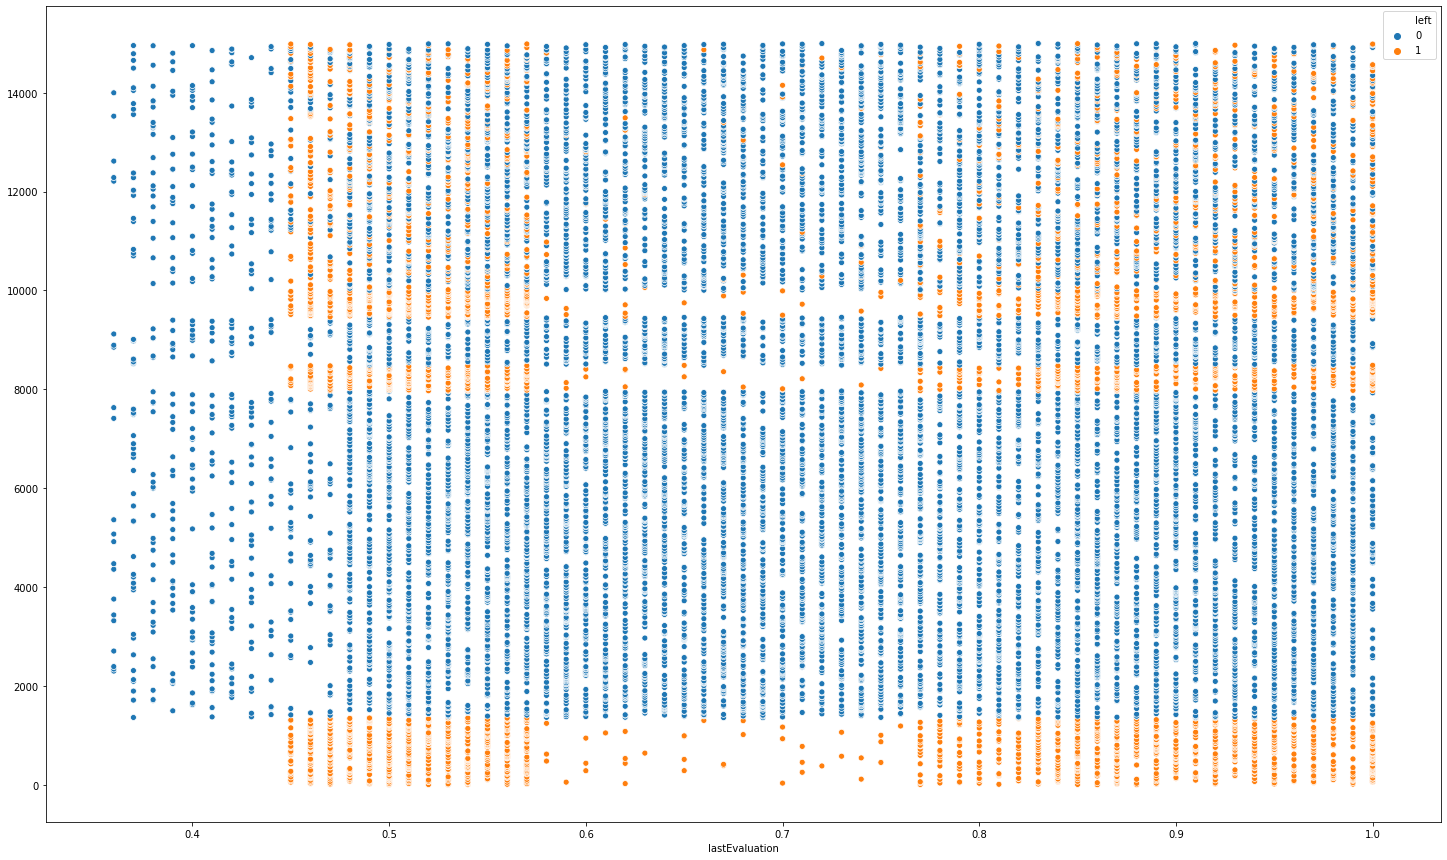

In [194]:
plt.figure(figsize=(25,15))
sb.scatterplot(data['lastEvaluation'],data.index,data['left'])

### this is evenly distributed so last evaluation not much significant for prediction of weather a perticular employees leaves the job or not

#    

## numberOfProjects v/s leaving the job

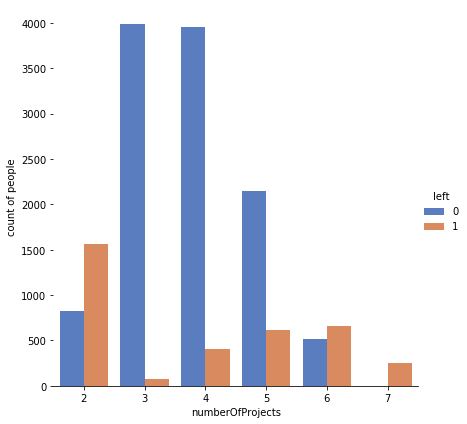

In [216]:
a=pd.DataFrame(data.groupby(['numberOfProjects','left'])['left'].count())
a.columns=['count']
b=a.reset_index()
g =sb.catplot(x='numberOfProjects', y='count', hue='left', data=b,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("count of people")

## we are not finding much relation between no of project and people leaving the job

#  

## avgMonthlyHours v/s leaving the job

In [230]:
data[data['avgMonthlyHours']<=data['avgMonthlyHours'].mean()].groupby('left')['left'].count()

left
0    5954
1    1656
Name: left, dtype: int64

In [224]:
data[data['avgMonthlyHours']>=data['avgMonthlyHours'].mean()].groupby('left')['left'].count()

left
0    5474
1    1915
Name: left, dtype: int64

### there are equal no of people leaving whoose avg monthly working hours is less and more than avg

#    

## dept v/s leaving the job

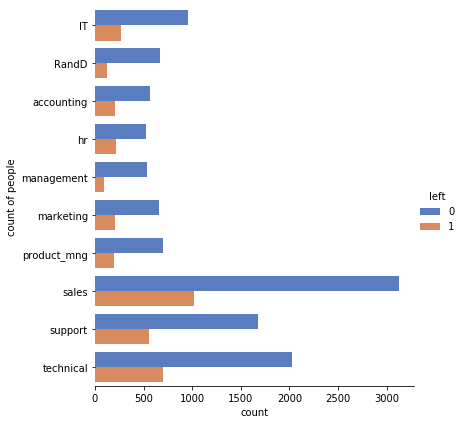

In [259]:
b=pd.DataFrame(data.groupby(['dept','left'])['left'].count())
b.columns=['count']
b=b.reset_index()
g =sb.catplot(y='dept', x='count', hue='left', data=b,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("count of people")

## salary v/s leaving the job

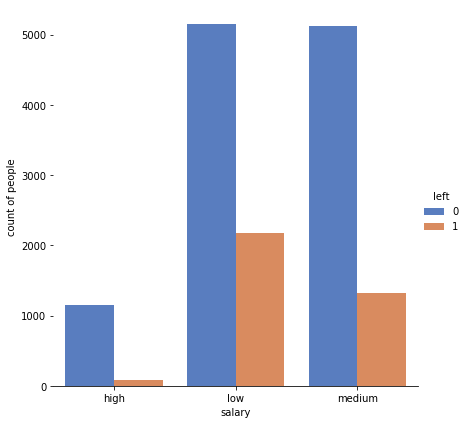

In [264]:
b=pd.DataFrame(data.groupby(['salary','left'])['left'].count())
b.columns=['count']
b=b.reset_index()
g =sb.catplot(y='count', x='salary', hue='left', data=b,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("count of people")

## low salary people are leaving the job most 

In [12]:
data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

## There are no null values in this data 


###   

In [16]:
data1=pd.get_dummies(data,prefix='_a')

In [17]:
data1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,_a_IT,_a_RandD,...,_a_hr,_a_management,_a_marketing,_a_product_mng,_a_sales,_a_support,_a_technical,_a_high,_a_low,_a_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [135]:
X1=data1.drop('left',axis=1)
Y=data1['left']

#   

# Z-score Normalization

In [136]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X2=sc.fit_transform(X1)
X=pd.DataFrame(X2)
X.columns=X1.columns
X.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,_a_IT,_a_RandD,_a_accounting,_a_hr,_a_management,_a_marketing,_a_product_mng,_a_sales,_a_support,_a_technical,_a_high,_a_low,_a_medium
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,-0.975824,1.151898
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,-0.975824,1.151898
3,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132
4,-0.815830,-1.262546,-1.462863,-0.962134,-0.341235,-0.411165,-0.147412,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.299809,1.024775,-0.868132


In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.18,random_state=0)

### Logistic Regression 

In [138]:
from sklearn.linear_model import LogisticRegression

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LRR Score= 77.92592592592592


confusion Matrix is:
[[1876  141]
 [ 455  228]]


Area under the curve: 0.8242827619698159




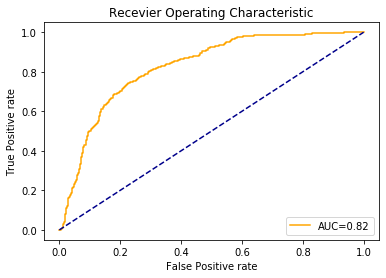

In [139]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_predict=lr.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('LRR Score=',lr.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=lr.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

# KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

KNN Score= 94.55555555555556


confusion Matrix is:
[[1931   86]
 [  61  622]]


Area under the curve: 0.9754498911521468




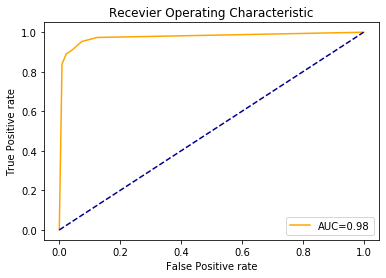

In [141]:
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train)
Y_predict=KN.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('KNN Score=',KN.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=KN.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

# naive_bayes

In [142]:
from sklearn.naive_bayes import GaussianNB

GNB Score= 66.48148148148148


confusion Matrix is:
[[1224  793]
 [ 112  571]]


Area under the curve: 0.8174121722314935




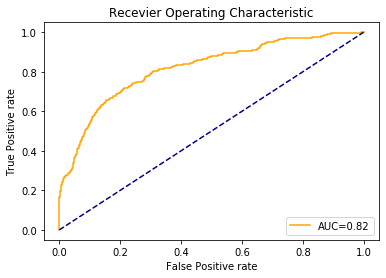

In [143]:
GNB=GaussianNB()
GNB.fit(X_train,Y_train)
Y_predict=GNB.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('GNB Score=',GNB.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=GNB.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

# DecisionTreeClassifier

In [144]:
from sklearn.tree import DecisionTreeClassifier

DT Score= 97.81481481481481


confusion Matrix is:
[[1976   41]
 [  18  665]]


Area under the curve: 0.9766592310891827




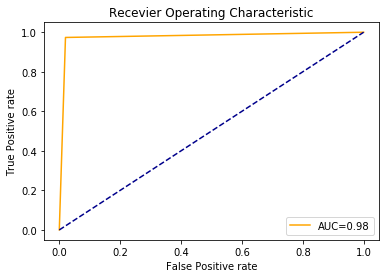

In [145]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
Y_predict=DT.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('DT Score=',DT.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=DT.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [146]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# AdaBoostClassifier

ADB Score= 95.96296296296296


confusion Matrix is:
[[1969   48]
 [  61  622]]


Area under the curve: 0.9819147059656173




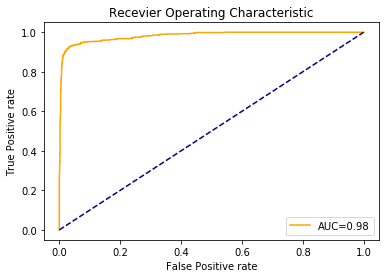

In [147]:
ADB=AdaBoostClassifier()
ADB.fit(X_train,Y_train)
Y_predict=ADB.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('ADB Score=',ADB.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=ADB.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show() 

## GradientBoostingClassifier

GBC Score= 97.4074074074074


confusion Matrix is:
[[1995   22]
 [  48  635]]


Area under the curve: 0.9884695316747616




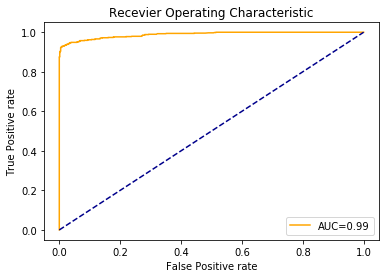

In [148]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
Y_predict=GBC.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('GBC Score=',GBC.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=GBC.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show() 

In [149]:
from xgboost import XGBClassifier

XGB Score= 97.37037037037038


confusion Matrix is:
[[1995   22]
 [  49  634]]


Area under the curve: 0.9888128796880977




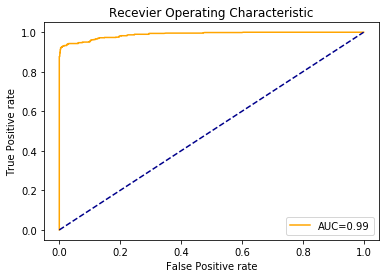

In [150]:
XGB=XGBClassifier()
XGB.fit(X_train,Y_train)
Y_predict=XGB.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('XGB Score=',XGB.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=XGB.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show() 

## RandomForestClassifier

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC Score= 99.14814814814815


confusion Matrix is:
[[2014    3]
 [  20  663]]


Area under the curve: 0.9865974502236118




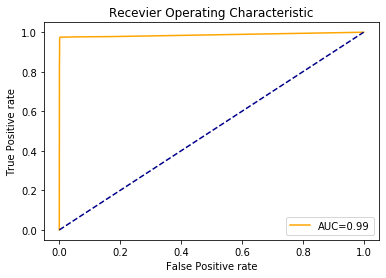

In [155]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
Y_predict=RFC.predict(X_test)
cm=confusion_matrix(Y_test,Y_predict)
print('RFC Score=',RFC.score(X_test,Y_test)*100)
print('\n')
print('confusion Matrix is:',cm,sep='\n')
print('\n')
from sklearn import metrics
probs=RFC.predict_proba(X_test)
prob_positive =probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)
print('\n')
plt.title('Recevier Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

## RandomForestClassifier gives the best accuracy of 99.148148148, this model is suitable as this model has highest area under the curve

#    

## •	Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s.

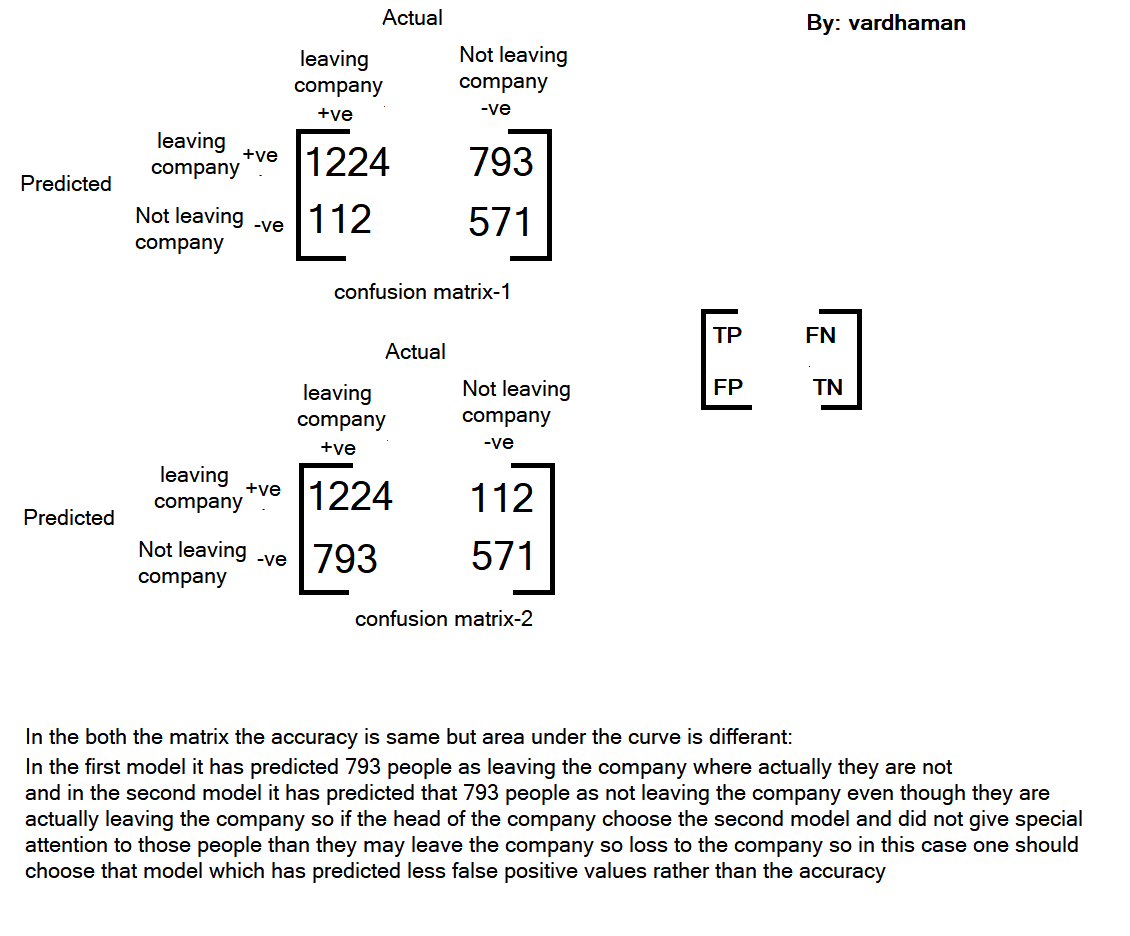

In [161]:
  display(Image(filename='E:/Data_Science/machine learning/notes images/confu.png'))